In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
#!pip install pandas

In [7]:
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [10]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0


In [11]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Part 2 - Now let's make the ANN!
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf

In [14]:
#!pip install tensorflow==2.12.*

In [16]:
#!pip3 install numpy --upgrade

In [39]:
# Initialising the ANN
classifier = Sequential()

In [40]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

- Units: 
Units are one of the most basic and necessary parameters of the Keras dense layer which defines the size of the output from the dense layer. It must be a positive integer since it represents the dimensionality of the output vector.

- Activation
In neural networks, the activation function is a function that is used for the transformation of the input values of neurons. Basically, it introduces the non-linearity into the networks of neural networks so that the networks can learn the relationship between the input and output values.
If in this Keras layer no activation is defined it will consider the linear activation function. The following options are available as activation functions in Keras

- use_bias
 Use_Bias parameter is used for deciding whether we want a dense layer to use a bias vector or not. It is a boolean parameter if not defined then use_bias is set to true.
 
- kernel_initializer 
This parameter is used for initializing the kernel weights matrix. The weight matrix is a matrix of weights that are multiplied with the input to extract relevant feature kernels.

- bias_initializer  
This parameter is used for initializing the bias vector. A bias vector can be defined as the additional sets of weight that require no input and correspond to the output layer. By default, it is set as zeros.

- Kernel regularizer
This parameter is used for regularization of the kernel weight matrix if we have initialized any matrix in the kernal_initializer.

-  bias_regularizer
This parameter is used for regularization of the bias vector if we have initialized any vector in the bias_initializer. By default, it is set as none.

- Activity_regularizer
This parameter is used for the regularization of the activation function which we have defined in the activation parameter. It is applied to the output of the layer. By default, it is set as none.

- kernal_constraint 
This parameter is used to apply the constraint function to the kernel weight matrix. By default, it is set as none.

- Bias_constraint
This parameter is used to apply the constraint function to the bias vector. By default, it is set as none.

In [41]:
# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

In [42]:
# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.3))

In [44]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [46]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.5239 - accuracy: 0.7962 - val_loss: 0.4979 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4857 - accuracy: 0.7962 - val_loss: 0.4738 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4628 - accuracy: 0.7962 - val_loss: 0.4593 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4525 - accuracy: 0.7962 - val_loss: 0.4539 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4487 - accuracy: 0.7962 - val_loss: 0.4511 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4458 - accuracy: 0.7962 - val_loss: 0.4500 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4416 - accuracy: 0.7962 - val_loss: 0.4496 - val_accuracy: 0.7955

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


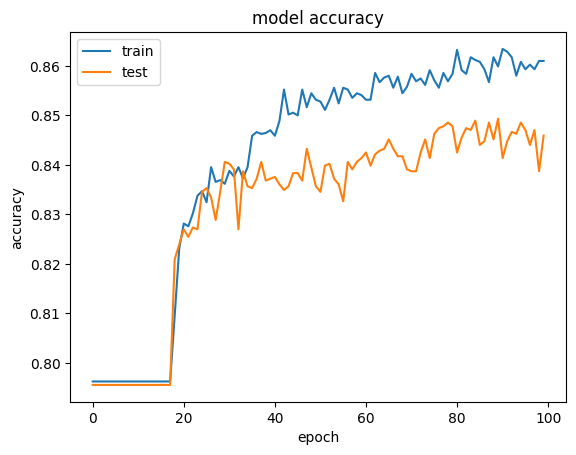

In [48]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


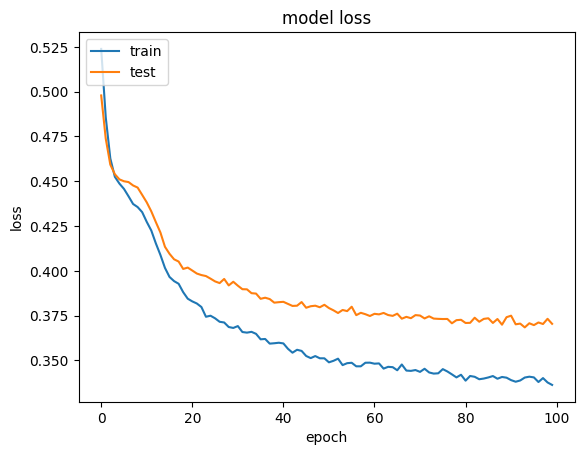

In [49]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 2ms/step


In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1552   43]
 [ 224  181]]


In [52]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8665
